# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

In [170]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [171]:
%matplotlib inline

In [174]:
import pandas as pd 

surf_df = pd.read_excel("years/WSL mens championship tour 2010.xlsx", skiprows=2)

surf_df.head()


,Rank,Unnamed: 1,Unnamed: 2,Name,1,2,3,4,5,6,7,8,9,10,Total Points
0,1.0,-,NaN,Kelly Slater,3750,10000,8000,1750,6500,10000,8000,10000,10000,6500,69000.0
1,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,-,NaN,Jordy Smith,8000,5250,5250,10000,1750,5250,5250,8000,5250,5250,52250.0
3,NaN,NaN,NaN,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,-,NaN,Mick Fanning,3750,8000,3750,3750,3750,6500,10000,1750,5250,1750,44750.0


In [200]:
year_frames = []
for year_data_path in os.listdir("years"):
    this_year = pd.read_excel(f"years/{year_data_path}", skiprows=2)
    year_int = int(year_data_path.rstrip(".xlsx").split(" ")[4])
    this_year["year"] = year_int
    this_year["year_dt"] = datetime(year=year_int, month=6, day=1)
    year_frames.append(this_year)

surf_df = pd.concat(year_frames)
surf_df.head()



,Rank,Unnamed: 1,Unnamed: 2,Name,1,2,3,4,5,6,7,8,9,10,Total Points,year,year_dt,11,Regular Season Total Points
0,1.0,-,NaN,Kelly Slater,3750,10000,8000,1750,6500,10000,8000,10000,10000,6500,69000.0,2010,2010-06-01,NaN,NaN
1,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2010-06-01,NaN,NaN
2,2.0,-,NaN,Jordy Smith,8000,5250,5250,10000,1750,5250,5250,8000,5250,5250,52250.0,2010,2010-06-01,NaN,NaN
3,NaN,NaN,NaN,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2010-06-01,NaN,NaN
4,3.0,-,NaN,Mick Fanning,3750,8000,3750,3750,3750,6500,10000,1750,5250,1750,44750.0,2010,2010-06-01,NaN,NaN


In [177]:
surf_df.head()

surf_df.columns


Index(['Rank', 'Unnamed: 1', 'Unnamed: 2', 'Name', '1 ', '2 ', '3 ', '4 ',
       '5 ', '6 ', '7 ', '8 ', '9 ', '10 ', 'Total Points', 'year', 'year_dt',
       '11 ', 'Regular Season Total Points'],
      dtype='object')

`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [202]:
surfers = []
for i, row in surf_df.iterrows():
    if i%2==0:
        named_surfer = row.to_dict()
        named_surfer["country"] = surf_df.iloc[i+1].Name
        surfers.append(named_surfer)

clean_surf_df = pd.DataFrame(surfers).head()
clean_surf_df.head()

,Rank,Unnamed: 1,Unnamed: 2,Name,1,2,3,4,5,6,7,8,9,10,Total Points,year,year_dt,11,Regular Season Total Points,country
0,1.0,-,NaN,Kelly Slater,3750,10000,8000,1750,6500,10000,8000,10000,10000,6500,69000.0,2010,2010-06-01,NaN,NaN,United States
1,2.0,-,NaN,Jordy Smith,8000,5250,5250,10000,1750,5250,5250,8000,5250,5250,52250.0,2010,2010-06-01,NaN,NaN,South Africa
2,3.0,-,NaN,Mick Fanning,3750,8000,3750,3750,3750,6500,10000,1750,5250,1750,44750.0,2010,2010-06-01,NaN,NaN,Australia
3,4.0,-,NaN,Dane Reynolds,6500,1750,6500,5250,3750,6500,1750,500,5250,6500,42000.0,2010,2010-06-01,NaN,NaN,United States
4,4.0,-,NaN,Taj Burrow,10000,6500,1750,6500,500,5250,1750,1750,6500,3750,42000.0,2010,2010-06-01,NaN,NaN,Australia


In [201]:
surf_df.sample(5)


,Rank,Unnamed: 1,Unnamed: 2,Name,1,2,3,4,5,6,7,8,9,10,Total Points,year,year_dt,11,Regular Season Total Points
48,25.0,NaN,NaN,Kolohe Andino,1750,1750,500,500,1750,1750,500,1750,4000,4000,17750.0,2015,2015-06-01,500,NaN
0,1.0,NaN,NaN,Gabriel Medina,10000,5200,4000,1750,10000.0,5200,10000,5200,5200,1750,62800.0,2014,2014-06-01,8000.0,NaN
46,24.0,-,NaN,Matt Wilkinson,500,1750,1750,3750,1750,1750,500,3750,1750,1750,18000.0,2010,2010-06-01,NaN,NaN
60,28.0,NaN,NaN,Connor O'Leary,1330,1330,265,1330,3320,1330,265,NaN,NaN,NaN,NaN,2021,2021-06-01,NaN,8640.0
87,NaN,NaN,NaN,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,2016-06-01,NaN,NaN


We can also get the list of columns out of the data frame

In [181]:
surf_df.columns

Index(['Rank', 'Unnamed: 1', 'Unnamed: 2', 'Name', '1 ', '2 ', '3 ', '4 ',
       '5 ', '6 ', '7 ', '8 ', '9 ', '10 ', 'Total Points', 'year', 'year_dt',
       '11 ', 'Regular Season Total Points'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [182]:
row_one = surf_df.iloc[1]
row_one


Rank                                           NaN
Unnamed: 1                                     NaN
Unnamed: 2                                     NaN
Name                                 United States
1                                              NaN
2                                              NaN
3                                              NaN
4                                              NaN
5                                              NaN
6                                              NaN
7                                              NaN
8                                              NaN
9                                              NaN
10                                             NaN
Total Points                                   NaN
year                                          2010
year_dt                        2010-06-01 00:00:00
11                                             NaN
Regular Season Total Points                    NaN
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [206]:
row_two = surf_df.iloc[2]
row_two

Rank                                           2.0
Unnamed: 1                                       -
Unnamed: 2                                     NaN
Name                                   Jordy Smith
1                                             8000
2                                             5250
3                                             5250
4                                            10000
5                                             1750
6                                             5250
7                                             5250
8                                             8000
9                                             5250
10                                            5250
Total Points                               52250.0
year                                          2010
year_dt                        2010-06-01 00:00:00
11                                             NaN
Regular Season Total Points                    NaN
Name: 2, dtype: object

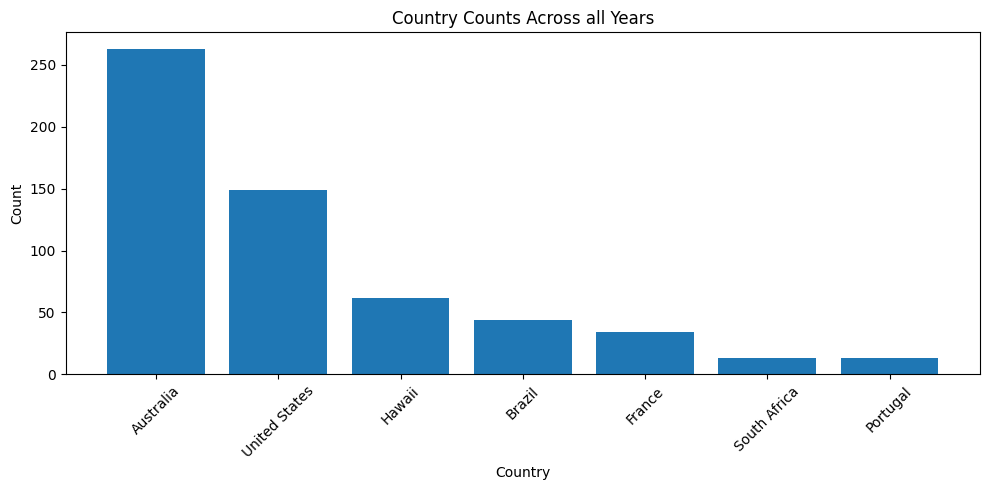

In [427]:
surf_df = {"years"}
surf_df = pd.DataFrame(surfers)
country_counts = surf_df['country'].value_counts()
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Counts Across all Years')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

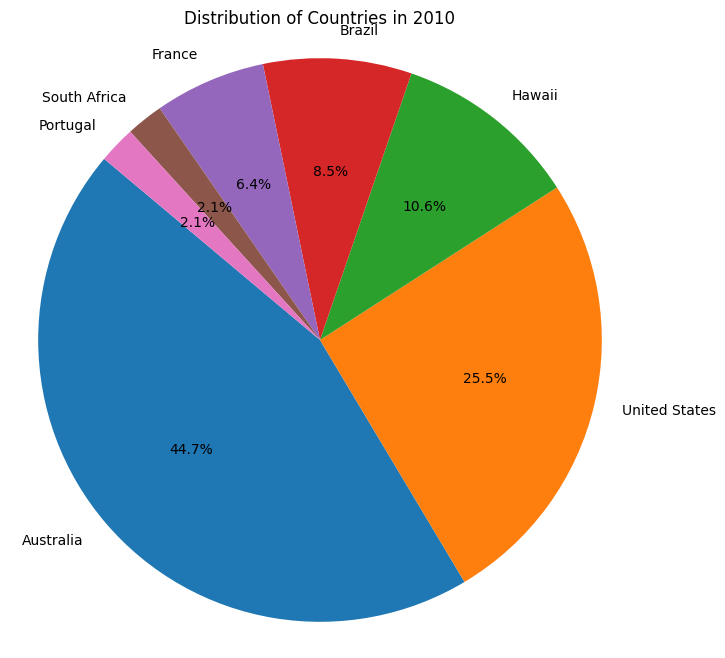

In [426]:
surf_df = pd.read_excel("years/WSL mens championship tour 2010.xlsx")
surf_df = pd.DataFrame(surfers)
data_2010 = surf_df[surf_df['year'] == 2010]
country_counts = data_2010['country'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Countries in 2010')
plt.axis('equal') 
plt.show()

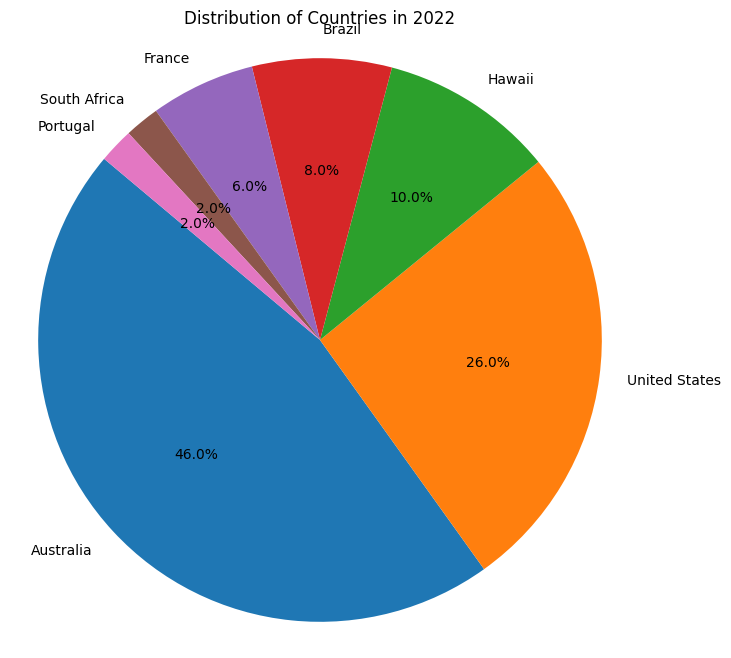

In [425]:
surf_df = pd.read_excel("years/WSL mens championship tour 2022.xlsx")
surf_df = pd.DataFrame(surfers)
data_2022 = surf_df[surf_df['year'] == 2022]
country_counts = data_2022['country'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Countries in 2022')
plt.axis('equal')  
plt.show()

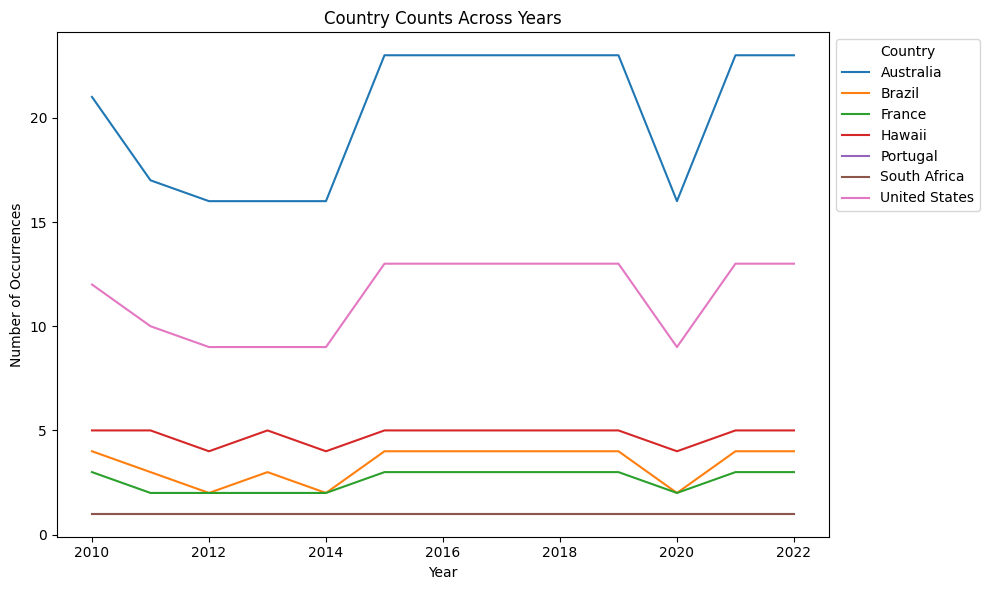

In [424]:
surf_df = {"years"}
surf_df = pd.DataFrame(surfers)
country_count_by_year = surf_df.groupby(['country', 'year']).size().reset_index(name='count')
pivot_table = country_count_by_year.pivot(index='year', columns='country', values='count').fillna(0)
pivot_table.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Country Counts Across Years')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

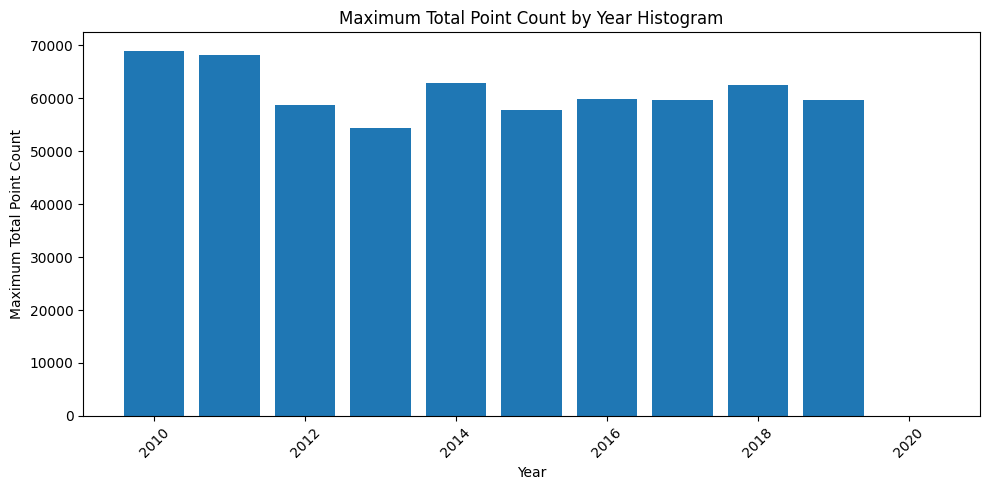

In [423]:
surf_df = {'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'Total_Points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 597400, 0, 43400, 54690]}
surf_df = pd.DataFrame(surfers)
max_point_counts = surf_df.groupby('year')['Total Points'].max()
plt.bar(max_point_counts.index, max_point_counts.values)
plt.xlabel('Year')
plt.ylabel('Maximum Total Point Count')
plt.title('Maximum Total Point Count by Year Histogram')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

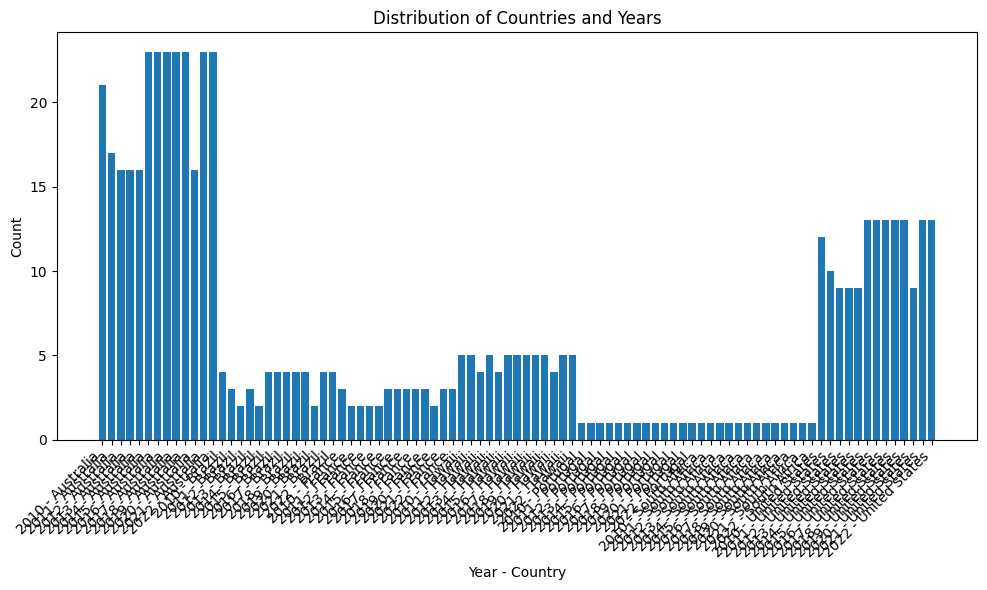

In [422]:
surf_df = {'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'country': ["United States", "United States", "Australia", "Australia", "Brazil", "Brazil", "Hawaii", "Hawaii", "Brazil", "Brazil", " ", "Brazil", "Brazil" ],
        'total_points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 597400, 0, 43400, 54690]}
surf_df = pd.DataFrame(surfers)
country_year_counts = surf_df.groupby(['country', 'year']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(country_year_counts['year'].astype(str) + ' - ' + country_year_counts['country'], country_year_counts['count'])
plt.xlabel('Year - Country')
plt.ylabel('Count')
plt.title('Distribution of Countries and Years')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


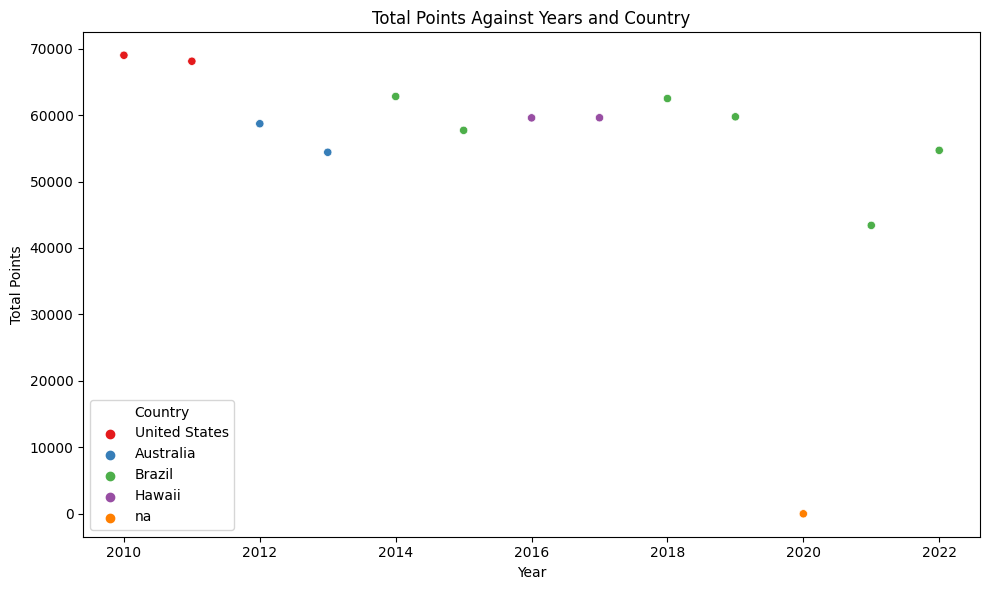

In [421]:
surf_df = {
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'country': ["United States", "United States", "Australia", "Australia", "Brazil", "Brazil", "Hawaii", "Hawaii", "Brazil", "Brazil", "na", "Brazil", "Brazil"],
    'total_points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 59740, 0, 43400, 54690]}
surf_df = pd.DataFrame(surf_df)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='total_points', hue='country', data=surf_df, palette='Set1', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points Against Years and Country')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


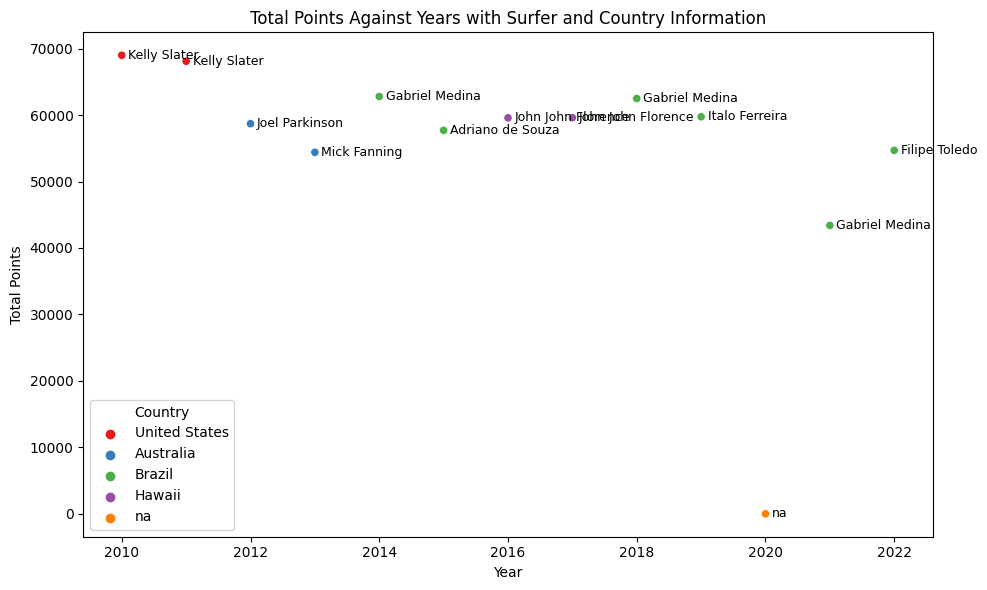

In [420]:
surf_df = {
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'country': ["United States", "United States", "Australia", "Australia", "Brazil", "Brazil", "Hawaii", "Hawaii", "Brazil", "Brazil", "na", "Brazil", "Brazil"],
    'surfer_name': ["Kelly Slater", "Kelly Slater", "Joel Parkinson", "Mick Fanning", "Gabriel Medina", "Adriano de Souza", "John John Florence", "John John Florence", "Gabriel Medina", "Italo Ferreira", "na", "Gabriel Medina", "Filipe Toledo"],
    'total_points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 59740, 0, 43400, 54690]}
surf_df = pd.DataFrame(surf_df)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='total_points', hue='country', data=surf_df, palette='Set1', marker='o')
for i, row in surf_df.iterrows():
    plt.text(row['year'] + 0.1, row['total_points'], row['surfer_name'], fontsize=9, verticalalignment='center')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points Against Years with Surfer and Country Information')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

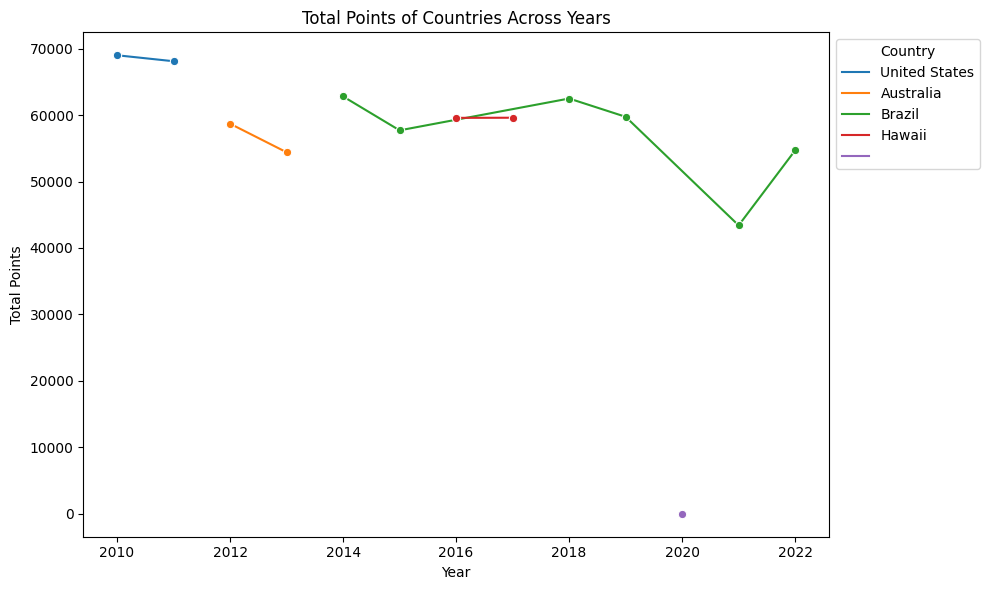

In [419]:
surf_df = {
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'country': ["United States", "United States", "Australia", "Australia", "Brazil", "Brazil", "Hawaii", "Hawaii", "Brazil", "Brazil", " ", "Brazil", "Brazil"],
    'total_points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 59740, 0, 43400, 54690]}
surf_df = pd.DataFrame(surf_df)
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='total_points', hue='country', data=surf_df, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points of Countries Across Years')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


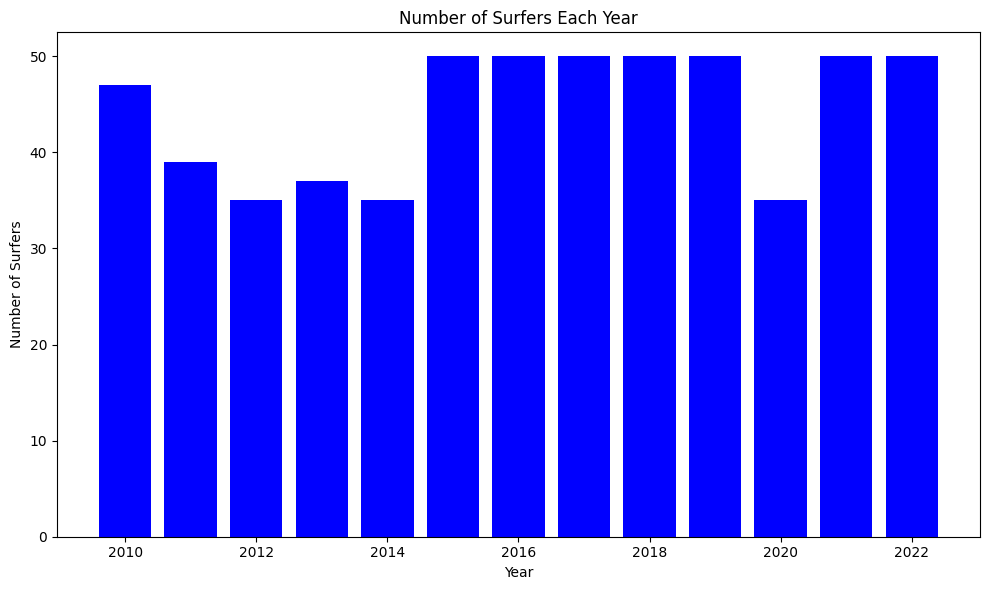

In [404]:
surf_df = pd.DataFrame(surfers)
surfer_count_by_year = surf_df['year'].value_counts().reset_index()
surfer_count_by_year.columns = ['year', 'surfer_count']
surfer_count_by_year = surfer_count_by_year.sort_values('year')
plt.figure(figsize=(10, 6))
plt.bar(surfer_count_by_year['year'], surfer_count_by_year['surfer_count'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Surfers')
plt.title('Number of Surfers Each Year')
plt.tight_layout()
plt.show()

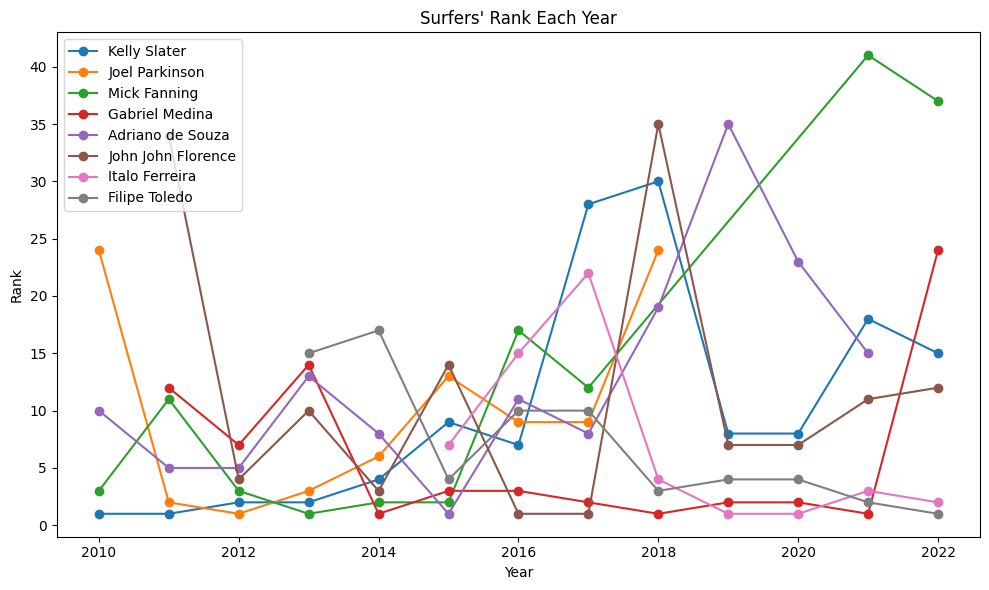

In [405]:
surf_df = pd.DataFrame(surfers)

kelly_slater_data = surf_df[surf_df['Name'] == 'Kelly Slater']
joel_parkinson_data = surf_df[surf_df['Name'] == 'Joel Parkinson']
mick_fanning_data = surf_df[surf_df['Name'] == 'Mick Fanning']
gabriel_medina_data = surf_df[surf_df['Name'] == 'Gabriel Medina']
adriano_de_souza_data = surf_df[surf_df['Name'] == 'Adriano de Souza']
john_john_florence_data = surf_df[surf_df['Name'] == 'John John Florence']
italo_ferreira_data = surf_df[surf_df['Name'] == 'Italo Ferreira']
filipe_toledo_data = surf_df[surf_df['Name'] == 'Filipe Toledo']

kelly_slater_data_sorted = kelly_slater_data.sort_values('year')
joel_parkinson_data_sorted = joel_parkinson_data.sort_values('year')
mick_fanning_data_sorted = mick_fanning_data.sort_values('year')
gabriel_medina_data_sorted = gabriel_medina_data.sort_values('year')
adriano_de_souza_data_sorted = adriano_de_souza_data.sort_values('year')
john_john_florence_data_sorted = john_john_florence_data.sort_values('year')
italo_ferreira_data_sorted = italo_ferreira_data.sort_values('year')
filipe_toledo_data_sorted = filipe_toledo_data.sort_values('year')

plt.figure(figsize=(10, 6))

plt.plot(kelly_slater_data_sorted['year'], kelly_slater_data_sorted['Rank'], marker='o', label="Kelly Slater")
plt.plot(joel_parkinson_data_sorted['year'], joel_parkinson_data_sorted['Rank'], marker='o', label="Joel Parkinson")
plt.plot(mick_fanning_data_sorted['year'], mick_fanning_data_sorted['Rank'], marker='o', label="Mick Fanning")
plt.plot(gabriel_medina_data_sorted['year'], gabriel_medina_data_sorted['Rank'], marker='o', label="Gabriel Medina")
plt.plot(adriano_de_souza_data_sorted['year'], adriano_de_souza_data_sorted['Rank'], marker='o', label="Adriano de Souza")
plt.plot(john_john_florence_data_sorted['year'], john_john_florence_data_sorted['Rank'], marker='o', label="John John Florence")
plt.plot(italo_ferreira_data_sorted['year'], italo_ferreira_data_sorted['Rank'], marker='o', label="Italo Ferreira")
plt.plot(filipe_toledo_data_sorted['year'], filipe_toledo_data_sorted['Rank'], marker='o', label="Filipe Toledo")

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Surfers' Rank Each Year")
plt.legend()
plt.tight_layout()
plt.show()

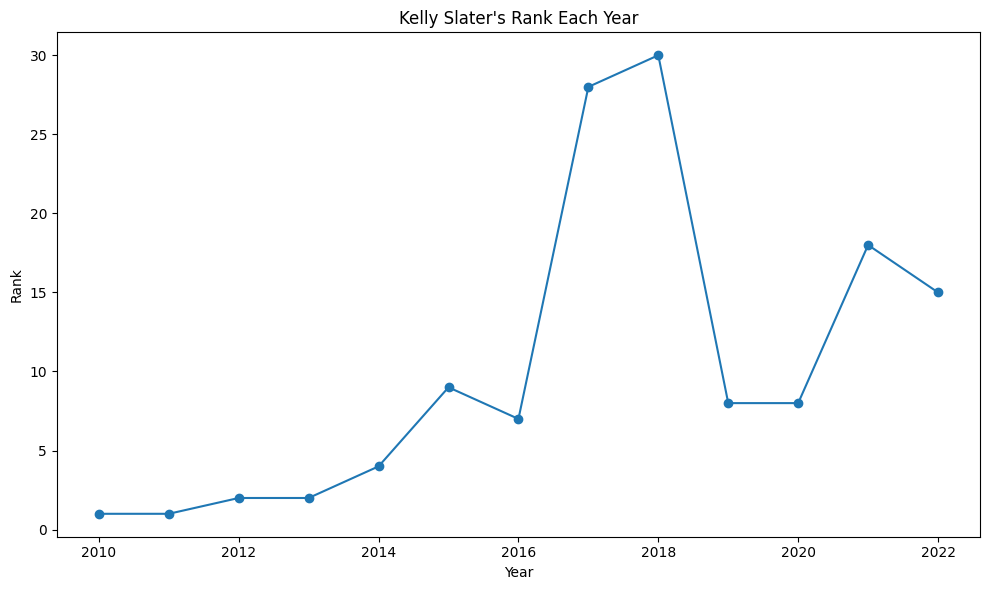

In [406]:

surf_df = pd.DataFrame(surfers)
kelly_slater_data = surf_df[surf_df['Name'] == 'Kelly Slater']
kelly_slater_data_sorted = kelly_slater_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(kelly_slater_data_sorted['year'], kelly_slater_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Kelly Slater's Rank Each Year")
plt.tight_layout()
plt.show()

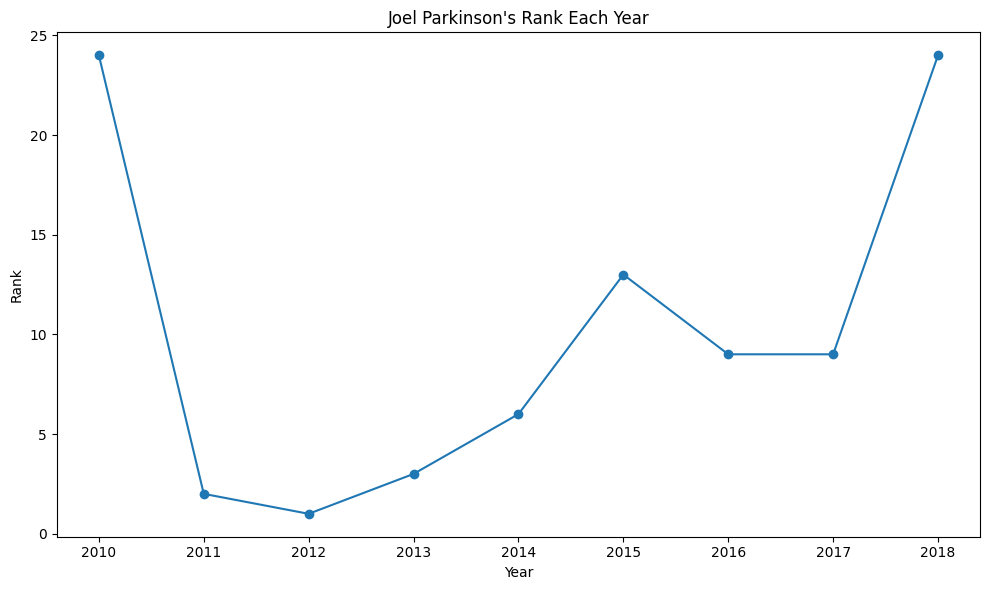

In [407]:
surf_df = pd.DataFrame(surfers)
joel_parkinson_data = surf_df[surf_df['Name'] == 'Joel Parkinson']
joel_parkinson_data_sorted = joel_parkinson_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(joel_parkinson_data_sorted['year'], joel_parkinson_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Joel Parkinson's Rank Each Year")
plt.tight_layout()
plt.show()

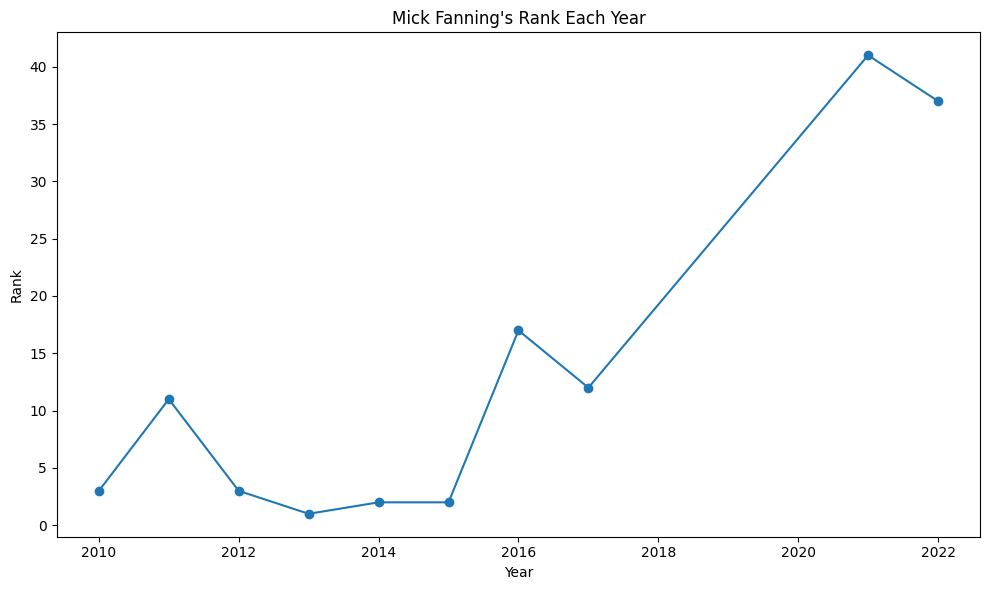

In [408]:
surf_df = pd.DataFrame(surfers)
mick_fanning_data = surf_df[surf_df['Name'] == 'Mick Fanning']
mick_fanning_data_sorted = mick_fanning_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(mick_fanning_data_sorted['year'], mick_fanning_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Mick Fanning's Rank Each Year")
plt.tight_layout()
plt.show()

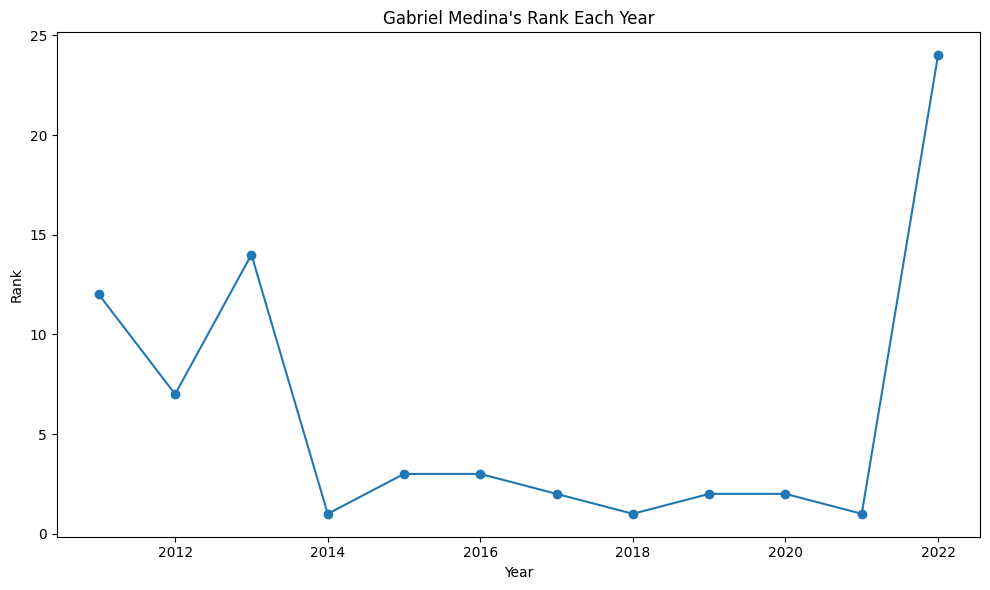

In [409]:
surf_df = pd.DataFrame(surfers)
gabriel_medina_data = surf_df[surf_df['Name'] == 'Gabriel Medina']
gabriel_medina_data_sorted = gabriel_medina_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(gabriel_medina_data_sorted['year'], gabriel_medina_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Gabriel Medina's Rank Each Year")
plt.tight_layout()
plt.show()

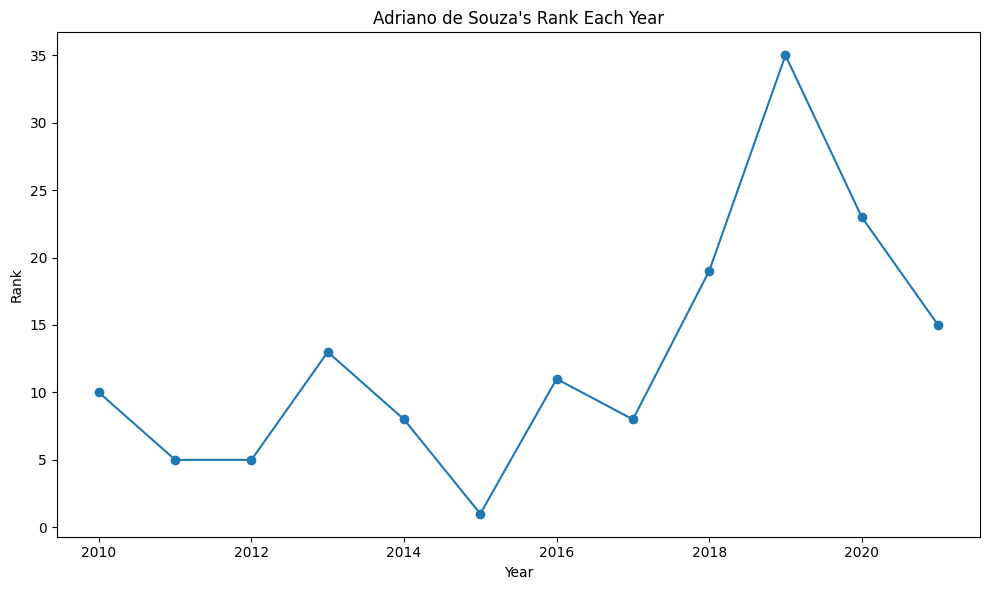

In [410]:
surf_df = pd.DataFrame(surfers)
adriano_de_souza_data = surf_df[surf_df['Name'] == 'Adriano de Souza']
adriano_de_souza_data_sorted = adriano_de_souza_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(adriano_de_souza_data_sorted['year'], adriano_de_souza_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Adriano de Souza's Rank Each Year")
plt.tight_layout()
plt.show()

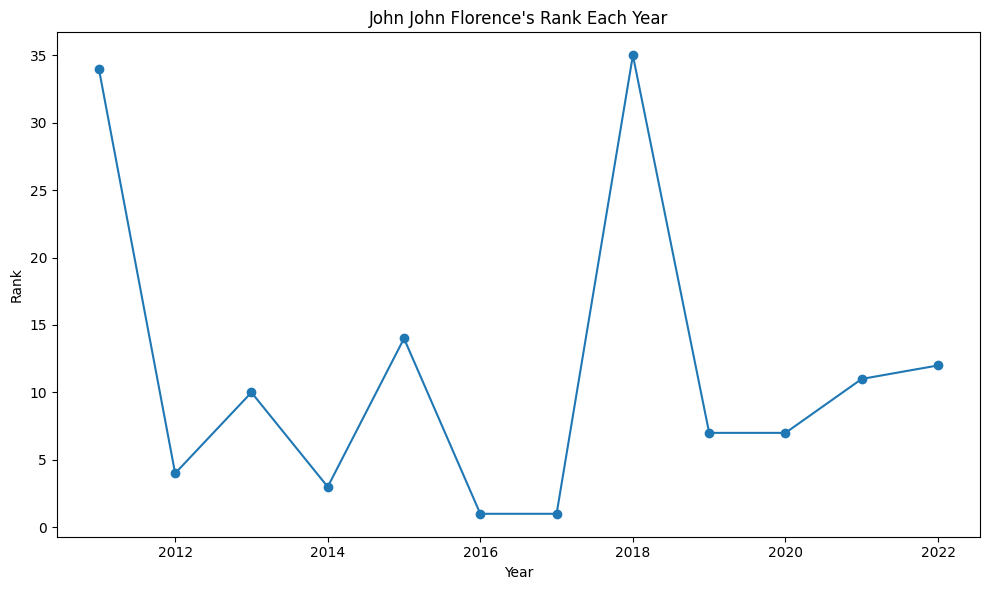

In [411]:
surf_df = pd.DataFrame(surfers)
john_john_florence_data = surf_df[surf_df['Name'] == 'John John Florence']
john_john_florence_data_sorted = john_john_florence_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(john_john_florence_data_sorted['year'], john_john_florence_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("John John Florence's Rank Each Year")
plt.tight_layout()
plt.show()


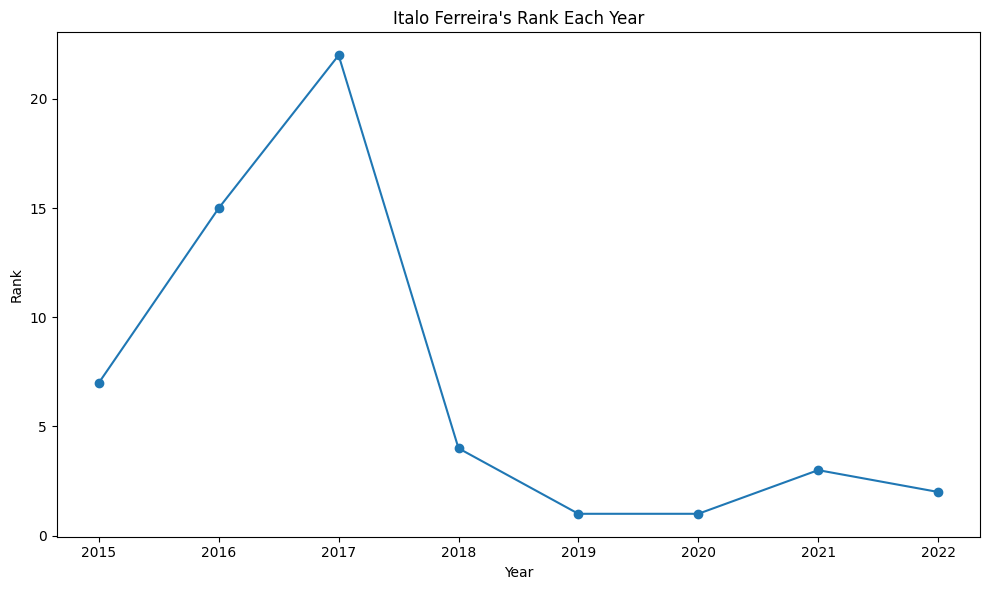

In [412]:
surf_df = pd.DataFrame(surfers)
italo_ferreira_data = surf_df[surf_df['Name'] == 'Italo Ferreira']
italo_ferreira_data_sorted = italo_ferreira_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(italo_ferreira_data_sorted['year'], italo_ferreira_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Italo Ferreira's Rank Each Year")
plt.tight_layout()
plt.show()

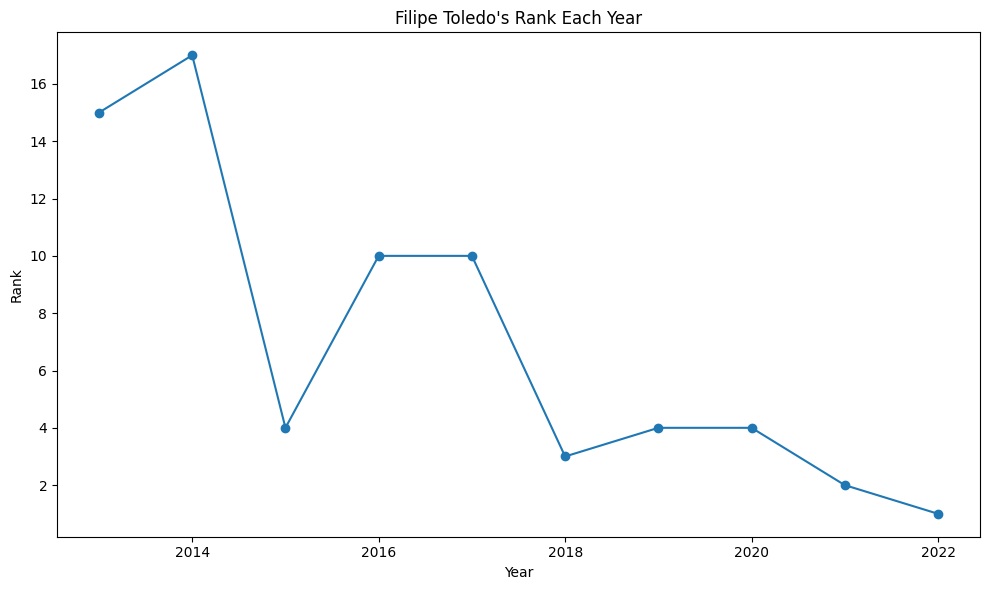

In [413]:
surf_df = pd.DataFrame(surfers)
filipe_toledo_data = surf_df[surf_df['Name'] == 'Filipe Toledo']
filipe_toledo_data_sorted = filipe_toledo_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(filipe_toledo_data_sorted['year'], filipe_toledo_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Filipe Toledo's Rank Each Year")
plt.tight_layout()
plt.show()

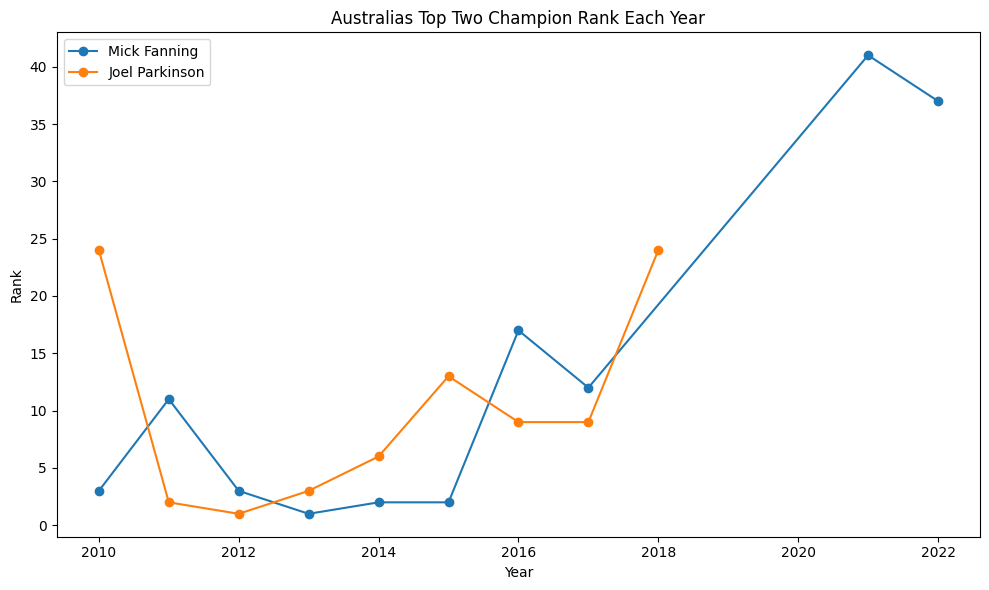

In [414]:
surf_df = pd.DataFrame(surfers)
mick_fanning_data = surf_df[surf_df['Name'] == 'Mick Fanning']
joel_parkinson_data = surf_df[surf_df['Name'] == 'Joel Parkinson']
mick_fanning_data_sorted = mick_fanning_data.sort_values('year')
joel_parkinson_data_sorted = joel_parkinson_data.sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(mick_fanning_data_sorted['year'], mick_fanning_data_sorted['Rank'], marker='o', label="Mick Fanning")
plt.plot(joel_parkinson_data_sorted['year'], joel_parkinson_data_sorted['Rank'], marker='o', label="Joel Parkinson")
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Australias Top Two Champion Rank Each Year")
plt.legend()
plt.tight_layout()
plt.show()

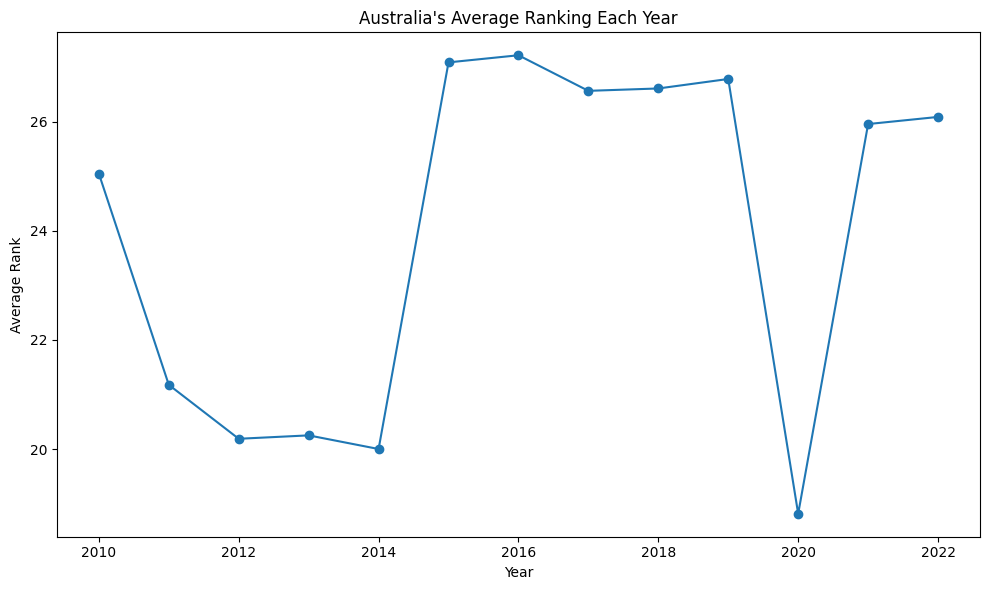

In [415]:
surf_df = pd.DataFrame(surfers)
australian_surfers_data = surf_df[surf_df['country'] == 'Australia']
australian_avg_rank_by_year = australian_surfers_data.groupby('year')['Rank'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(australian_avg_rank_by_year['year'], australian_avg_rank_by_year['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.title("Australia's Average Ranking Each Year")
plt.tight_layout()
plt.show()

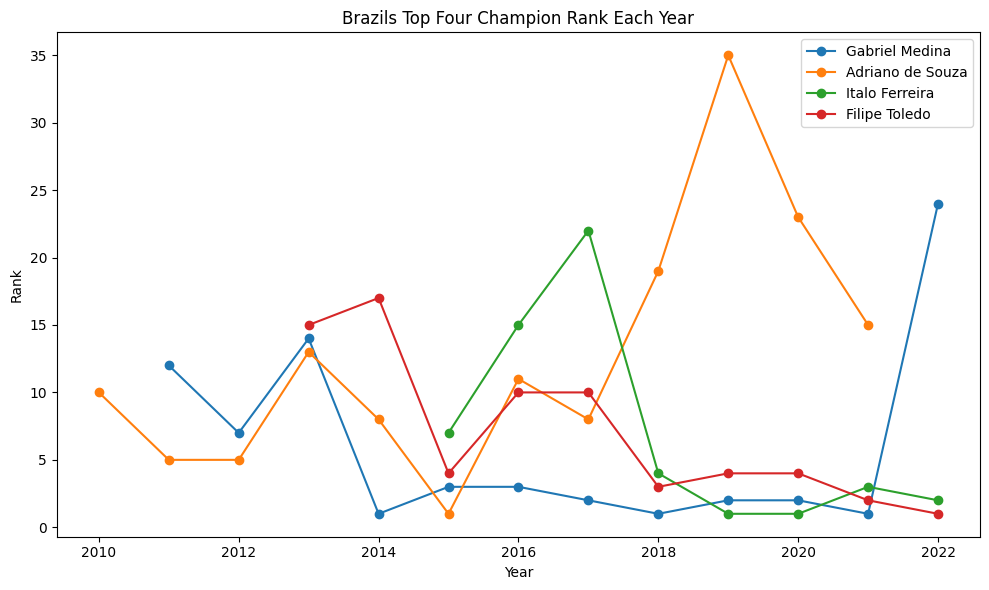

In [416]:
surf_df = pd.DataFrame(surfers)
gabriel_medina_data = surf_df[surf_df['Name'] == 'Gabriel Medina']
adriano_de_souza_data = surf_df[surf_df['Name'] == 'Adriano de Souza']
italo_ferreira_data = surf_df[surf_df['Name'] == 'Italo Ferreira']
filipe_toledo_data = surf_df[surf_df['Name'] == 'Filipe Toledo']

gabriel_medina_data_sorted = gabriel_medina_data.sort_values('year')
adriano_de_souza_data_sorted = adriano_de_souza_data.sort_values('year')
italo_ferreira_data_sorted = italo_ferreira_data.sort_values('year')
filipe_toledo_data_sorted = filipe_toledo_data.sort_values('year')

plt.figure(figsize=(10, 6))
plt.plot(gabriel_medina_data_sorted['year'], gabriel_medina_data_sorted['Rank'], marker='o', label="Gabriel Medina")
plt.plot(adriano_de_souza_data_sorted['year'], adriano_de_souza_data_sorted['Rank'], marker='o', label="Adriano de Souza")
plt.plot(italo_ferreira_data_sorted['year'], italo_ferreira_data_sorted['Rank'], marker='o', label="Italo Ferreira")
plt.plot(filipe_toledo_data_sorted['year'], filipe_toledo_data_sorted['Rank'], marker='o', label="Filipe Toledo")

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Brazils Top Four Champion Rank Each Year")
plt.legend()
plt.tight_layout()
plt.show()

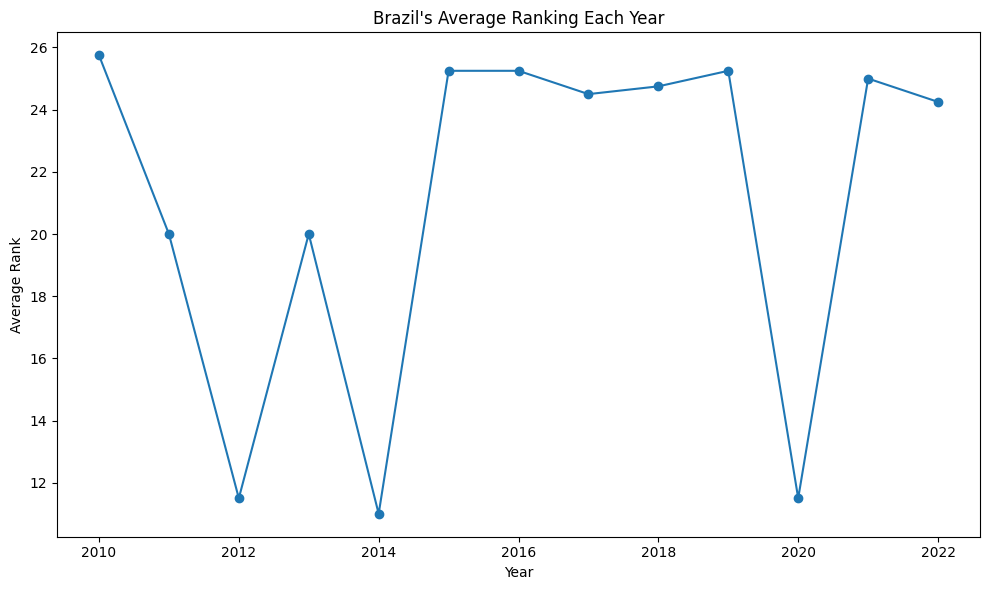

In [417]:
surf_df = pd.DataFrame(surfers)
brazilian_surfers_data = surf_df[surf_df['country'] == 'Brazil']
brazilian_avg_rank_by_year = brazilian_surfers_data.groupby('year')['Rank'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(brazilian_avg_rank_by_year['year'], brazilian_avg_rank_by_year['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.title("Brazil's Average Ranking Each Year")
plt.tight_layout()
plt.show()

/var/folders/58/g91mjyn53y5716_pzxw3gpkr0000gn/T/ipykernel_13246/4066709054.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


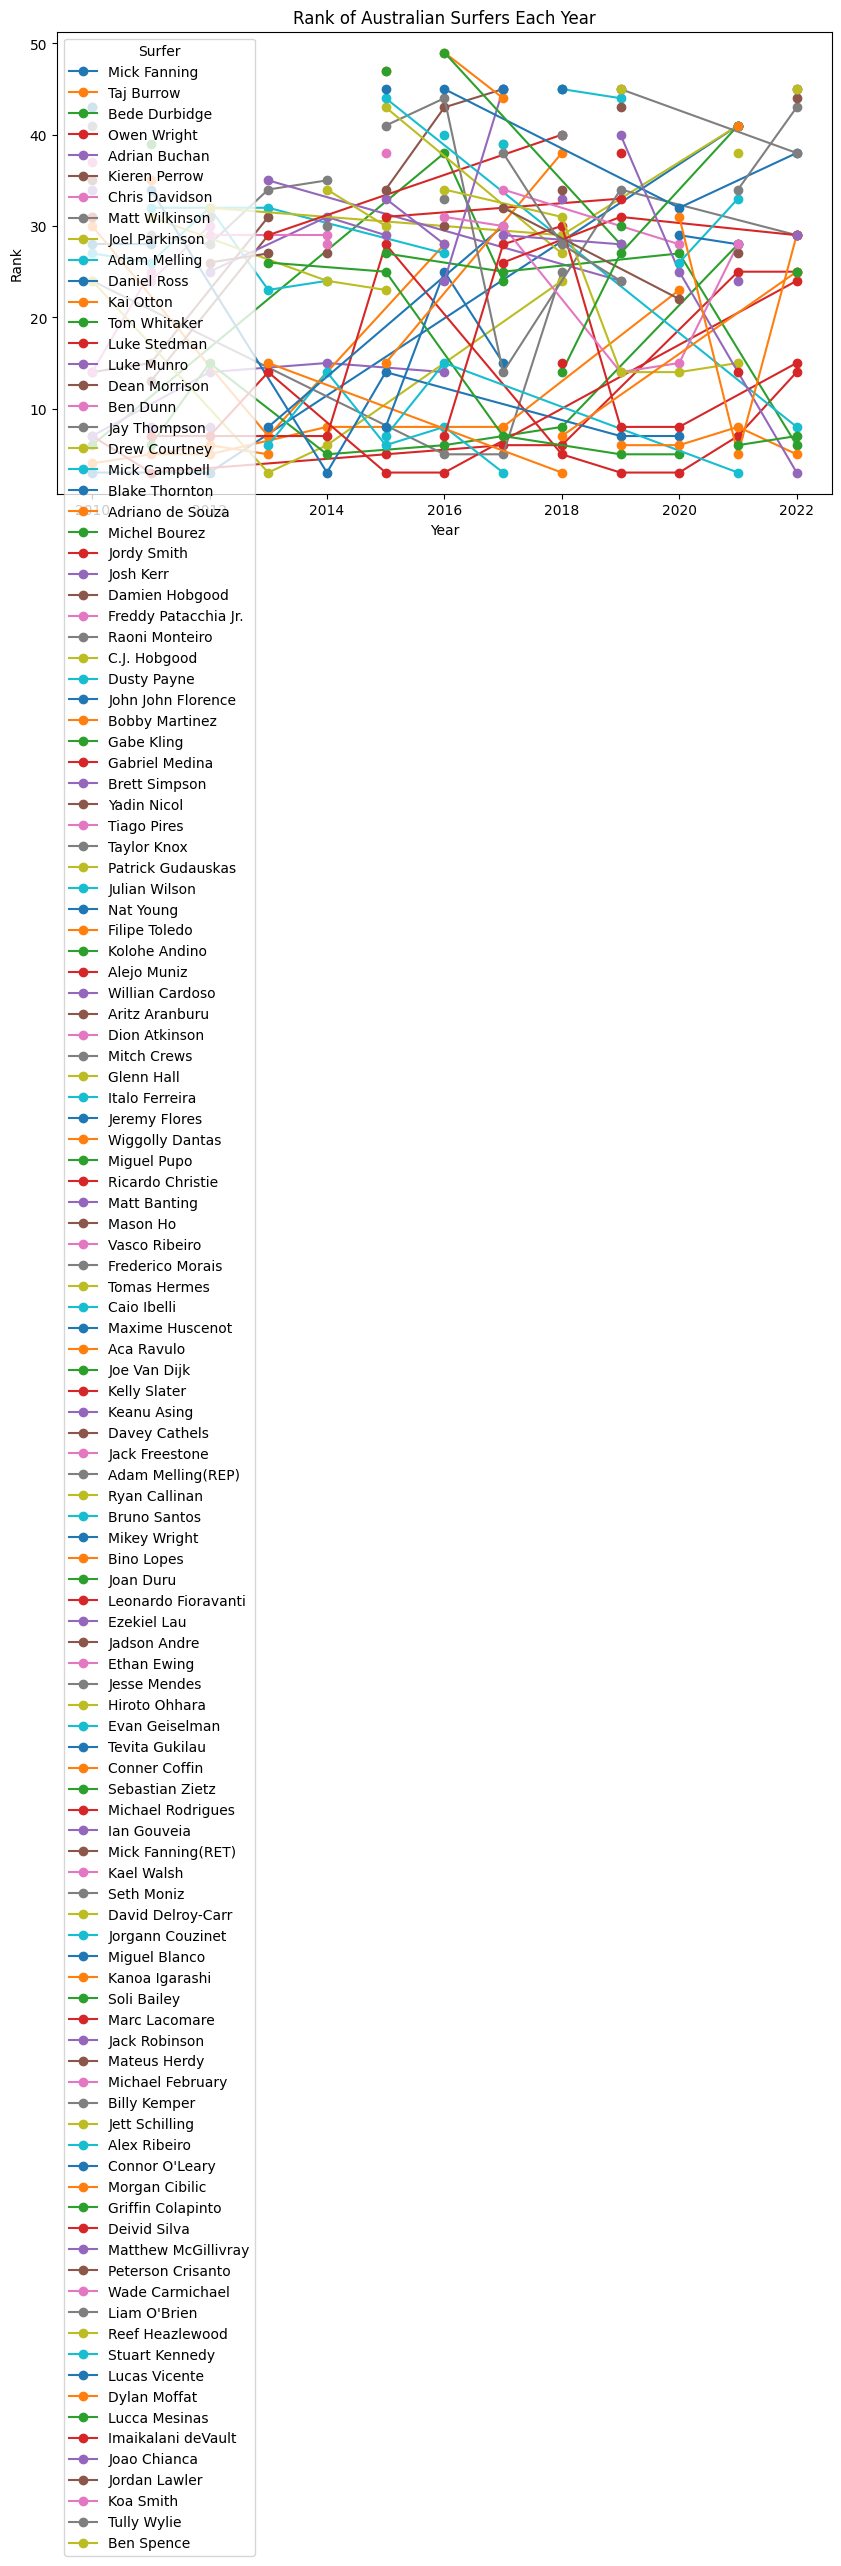

In [418]:
surf_df = pd.DataFrame(surfers)
australian_surfers_data = surf_df[surf_df['country'] == 'Australia']
australian_surfers_data_sorted = australian_surfers_data.sort_values(['year', 'Rank'])
australian_surfers = australian_surfers_data_sorted['Name'].unique()
plt.figure(figsize=(10, 6))

for surfer in australian_surfers:
    surfer_data = australian_surfers_data_sorted[australian_surfers_data_sorted['Name'] == surfer]
    plt.plot(surfer_data['year'], surfer_data['Rank'], marker='o', label=surfer)

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Rank of Australian Surfers Each Year")
plt.legend(title='Surfer')
plt.tight_layout()
plt.show()